# Application Question

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

We split the data into LMC and SMC, and then again by mode F and 1 (for you) below:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [6]:
# read in the csv data file using Pandas
cep = pd.read_csv("Cepheids.csv")
print(cep.columns)

Index(['name', 'RA0', 'Decl0', 'Mode', 'Cloud', 'W', 'logP1', 'VI'], dtype='object')


## Read the data and split it into four samples

In [7]:
#select Cepheids belonging to the LMC and SMC clouds with F and 1 modes
lmcf = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == 'F')]
smcf = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == 'F')]

lmco = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == '1')]
smco = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == '1')]

## Part 1: plot the `W` on the y-axis vs `log(P1)` on x.

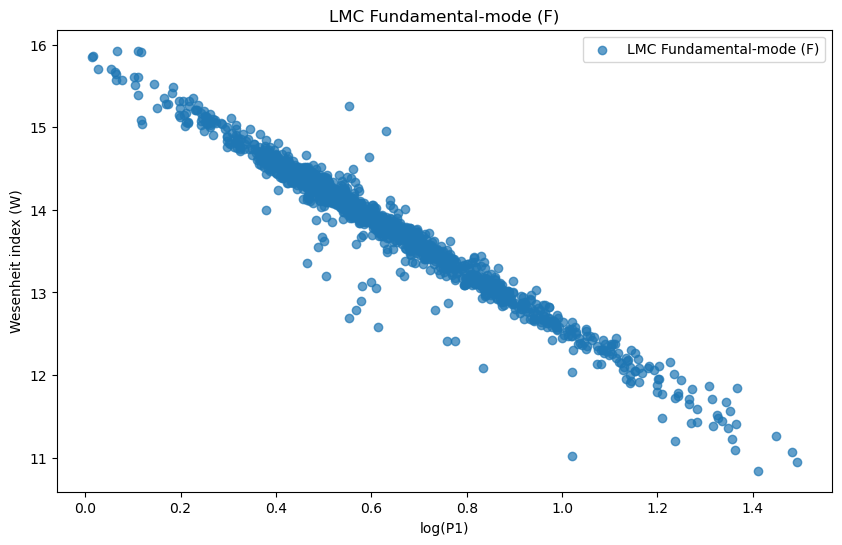

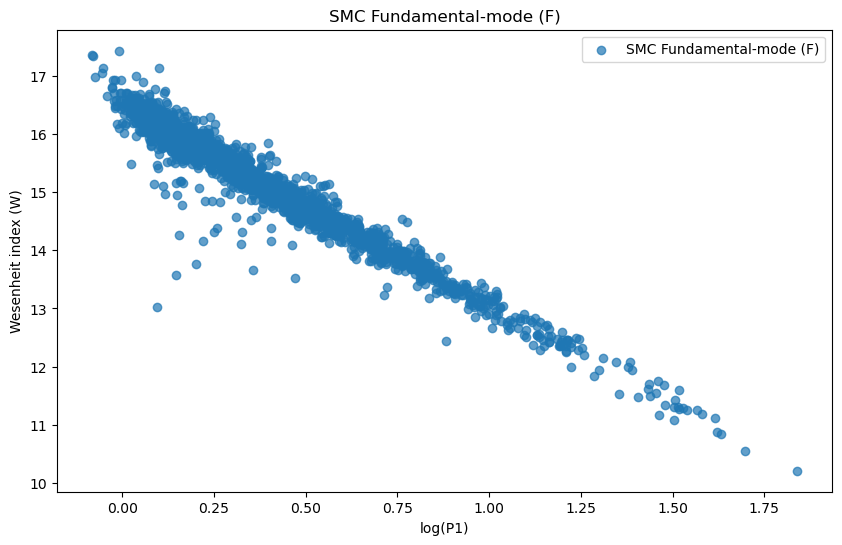

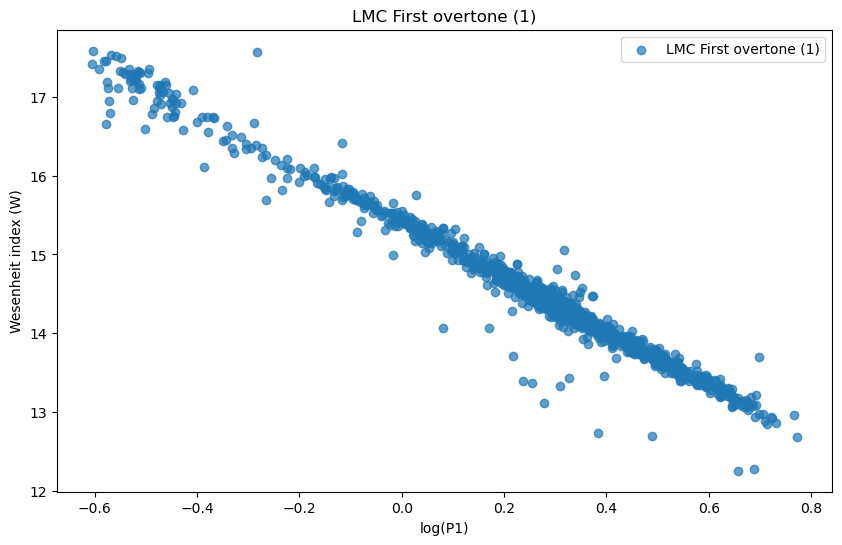

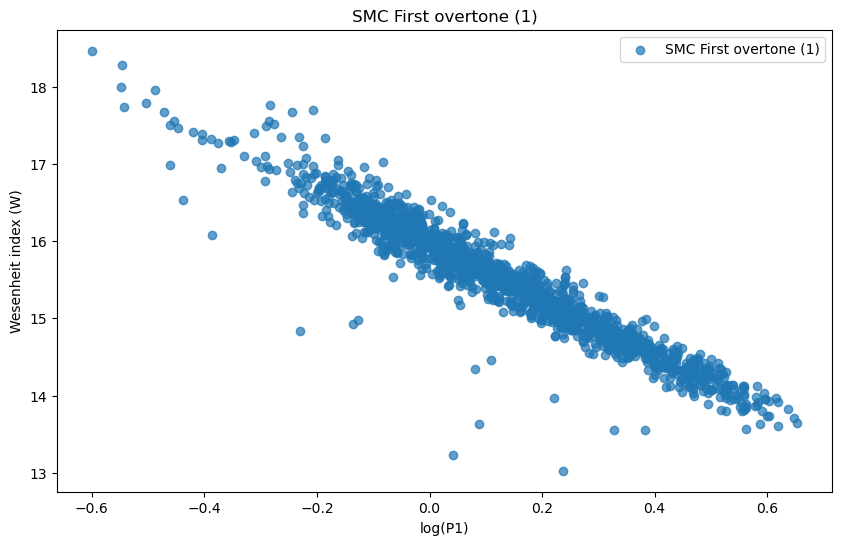

In [8]:
# Function to plot W vs logP1 for each dataset
def plot_W_vs_logP1(df, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['logP1'], df['W'], label=title, alpha=0.7)
    plt.xlabel('log(P1)')
    plt.ylabel('Wesenheit index (W)')
    plt.title(title)
    plt.legend()
    plt.show()

plot_W_vs_logP1(lmcf, 'LMC Fundamental-mode (F)')
plot_W_vs_logP1(smcf, 'SMC Fundamental-mode (F)')
plot_W_vs_logP1(lmco, 'LMC First overtone (1)')
plot_W_vs_logP1(smco, 'SMC First overtone (1)')


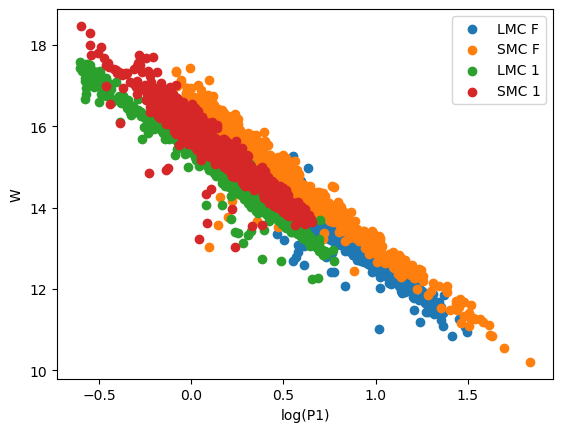

In [12]:
### Plot them together
plt.scatter(lmcf['logP1'], lmcf['W'], label='LMC F')
plt.scatter(smcf['logP1'], smcf['W'], label='SMC F')
plt.scatter(lmco['logP1'], lmco['W'], label='LMC 1')
plt.scatter(smco['logP1'], smco['W'], label='SMC 1')
plt.xlabel('log(P1)')
plt.ylabel('W')
plt.legend()
plt.show()


I have seen in the video that the luminosity is directly proportional to the period of the cepheid variable stars. The graph, therefore should show a linear relation with positive slope. But the graph I could generate is a negative slope-direction relation graph.  

## Part 2: Fit or estimate straight lines to each of the four samples
Note: You can use any fitting function/algorithm you like (i.e. statsmodels, astropy, scipy, numpy, etc..).

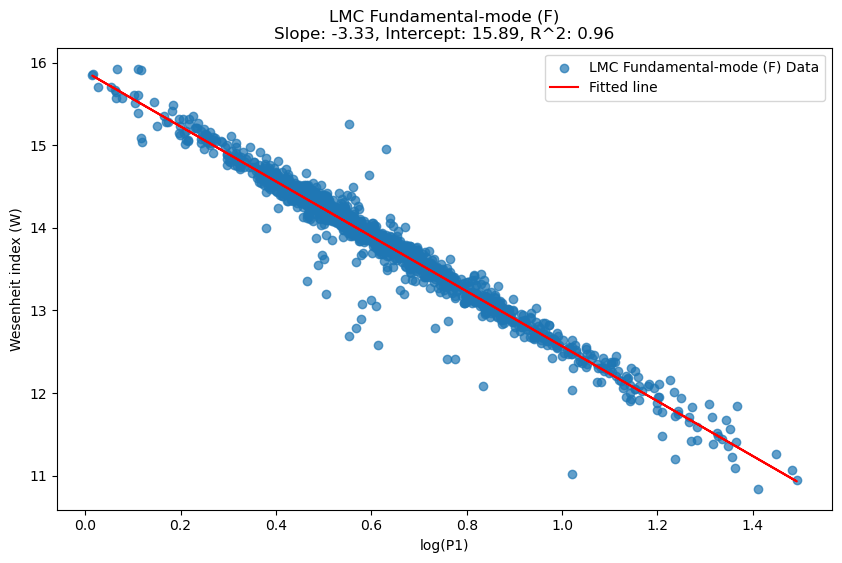

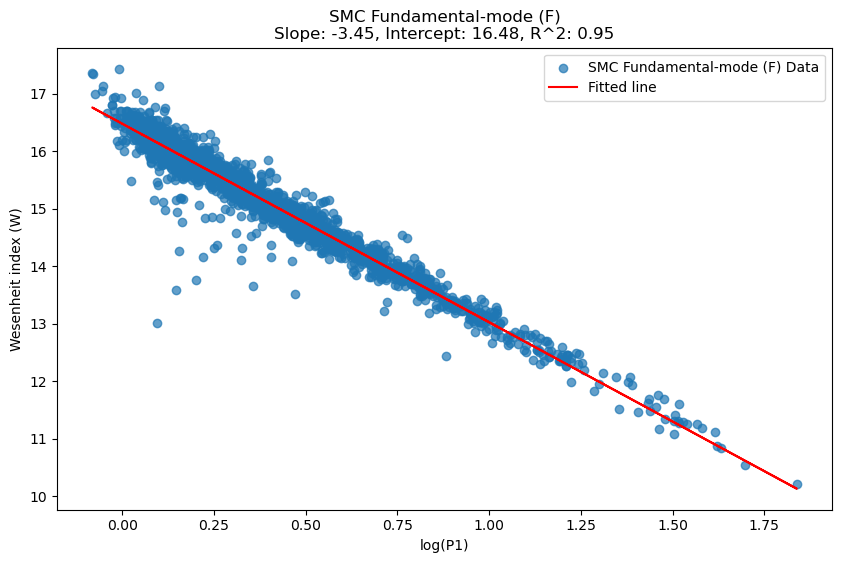

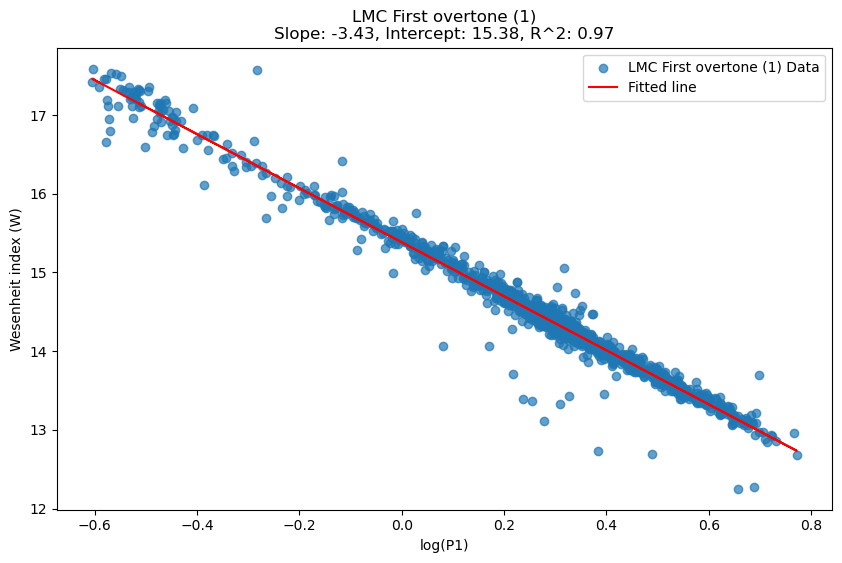

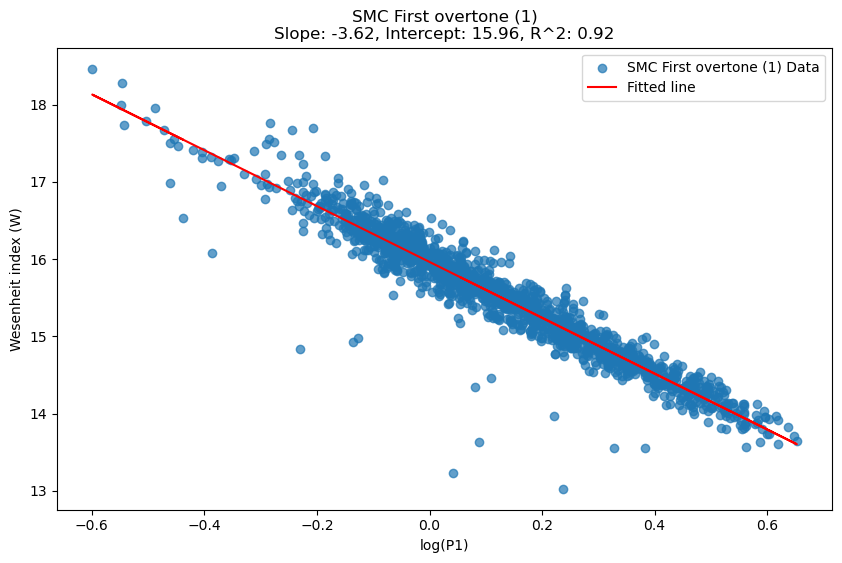

In [9]:
# Function to fit a straight line and plot it
def fit_line_and_plot(df, title):
    slope, intercept, r_value, p_value, std_err = linregress(df['logP1'], df['W'])
    plt.figure(figsize=(10, 6))
    plt.scatter(df['logP1'], df['W'], label=f'{title} Data', alpha=0.7)
    plt.plot(df['logP1'], slope * df['logP1'] + intercept, color='red', label='Fitted line')
    plt.xlabel('log(P1)')
    plt.ylabel('Wesenheit index (W)')
    plt.title(f'{title}\nSlope: {slope:.2f}, Intercept: {intercept:.2f}, R^2: {r_value**2:.2f}')
    plt.legend()
    plt.show()
    return slope, intercept

slope_lmcf, intercept_lmcf = fit_line_and_plot(lmcf, 'LMC Fundamental-mode (F)')
slope_smcf, intercept_smcf = fit_line_and_plot(smcf, 'SMC Fundamental-mode (F)')
slope_lmco, intercept_lmco = fit_line_and_plot(lmco, 'LMC First overtone (1)')
slope_smco, intercept_smco = fit_line_and_plot(smco, 'SMC First overtone (1)')


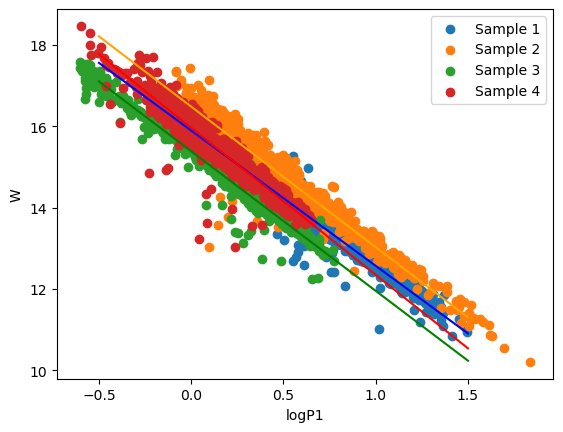

In [14]:
#Together:

# YOUR CODE HERE
def fit_line(x, y):
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        return slope, intercept
 
lmcf_slope, lmcf_intercept = fit_line(lmcf['logP1'], lmcf['W'])
smcf_slope, smcf_intercept = fit_line(smcf['logP1'], smcf['W'])
lmco_slope, lmco_intercept = fit_line(lmco['logP1'], lmco['W'])
smco_slope, smco_intercept = fit_line(smco['logP1'], smco['W'])


x_range = np.linspace(-0.5, 1.5, 100)


plt.scatter(lmcf['logP1'], lmcf['W'], label='Sample 1')
plt.plot(x_range, lmcf_slope * x_range + lmcf_intercept, color='blue')


plt.scatter(smcf['logP1'], smcf['W'], label='Sample 2')
plt.plot(x_range, smcf_slope * x_range + smcf_intercept, color='orange')


plt.scatter(lmco['logP1'], lmco['W'], label='Sample 3')
plt.plot(x_range, lmco_slope * x_range + lmco_intercept, color='green')


plt.scatter(smco['logP1'], smco['W'], label='Sample 4')
plt.plot(x_range, smco_slope * x_range + smco_intercept, color='red')


plt.legend()
plt.xlabel('logP1')
plt.ylabel('W')


plt.show()


Therefore, the relation between Weisenheit index and log of periodicity of the cepheid variables is linear

## Part 3: Compute the residuals of each sample to its respective line.
Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

/tmp/ipykernel_13452/1139595689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals'] = df['W'] - (slope * df['logP1'] + intercept)
/tmp/ipykernel_13452/1139595689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals'] = df['W'] - (slope * df['logP1'] + intercept)
/tmp/ipykernel_13452/1139595689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

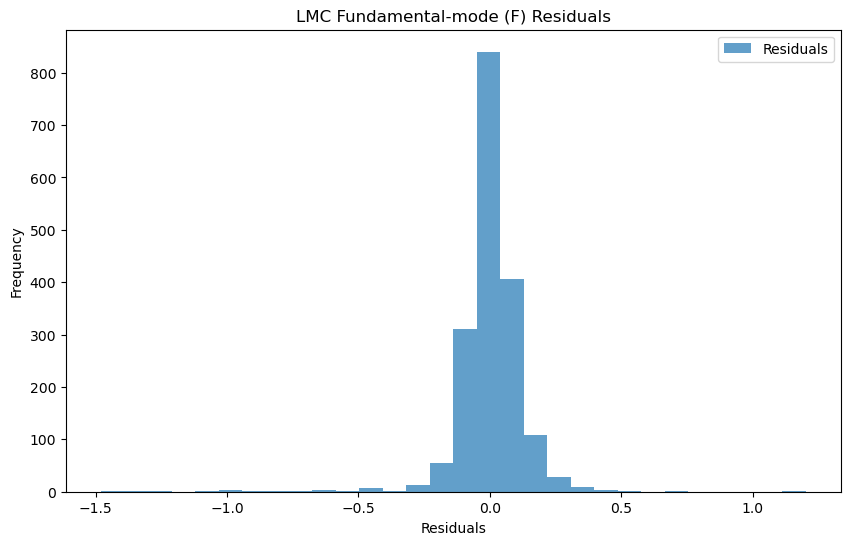

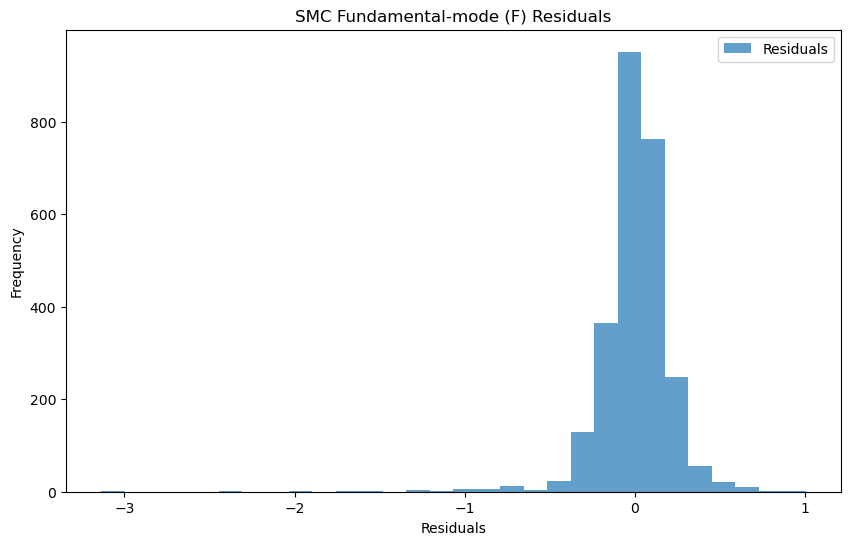

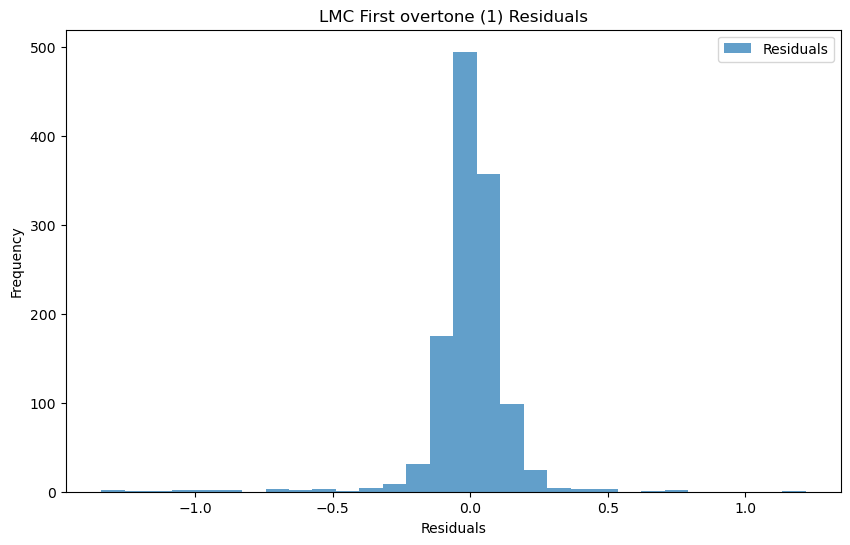

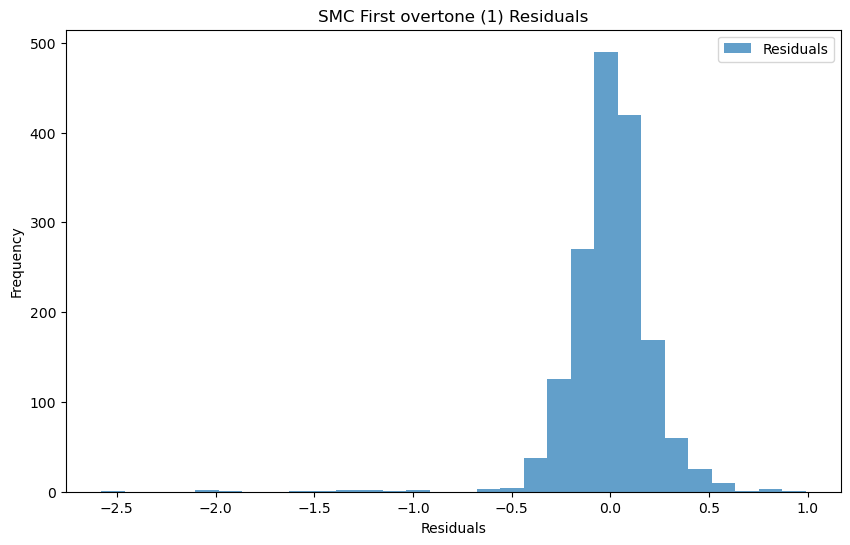

In [10]:
# Function to compute residuals
def compute_residuals(df, slope, intercept):
    df['residuals'] = df['W'] - (slope * df['logP1'] + intercept)
    return df

lmcf = compute_residuals(lmcf, slope_lmcf, intercept_lmcf)
smcf = compute_residuals(smcf, slope_smcf, intercept_smcf)
lmco = compute_residuals(lmco, slope_lmco, intercept_lmco)
smco = compute_residuals(smco, slope_smco, intercept_smco)

# Plot histograms of residuals
def plot_residuals_histogram(df, title):
    plt.figure(figsize=(10, 6))
    plt.hist(df['residuals'], bins=30, alpha=0.7, label='Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'{title} Residuals')
    plt.legend()
    plt.show()

plot_residuals_histogram(lmcf, 'LMC Fundamental-mode (F)')
plot_residuals_histogram(smcf, 'SMC Fundamental-mode (F)')
plot_residuals_histogram(lmco, 'LMC First overtone (1)')
plot_residuals_histogram(smco, 'SMC First overtone (1)')


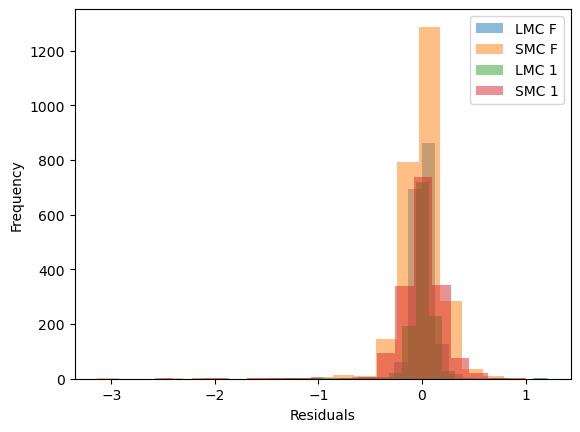

In [15]:
#Together:
# YOUR CODE HERE

def compute_residuals(x, y, slope, intercept):
    y_pred = slope* x + intercept
    residuals = y -y_pred
    return residuals

lmcf_res = compute_residuals(lmcf['logP1'], lmcf['W'], lmcf_slope, lmcf_intercept)
smcf_res = compute_residuals(smcf['logP1'], smcf['W'], smcf_slope, smcf_intercept)
lmco_res = compute_residuals(lmco['logP1'], lmco['W'], lmco_slope, lmco_intercept)
smco_res = compute_residuals(smco['logP1'], smco['W'], smco_slope, smco_intercept)

plt.hist(lmcf_res, bins=20, alpha=0.5, label='LMC F')
plt.hist(smcf_res, bins=20, alpha=0.5, label='SMC F')
plt.hist(lmco_res, bins=20, alpha=0.5, label='LMC 1')
plt.hist(smco_res, bins=20, alpha=0.5, label='SMC 1')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The residuals do look like normal distribution. This might be because the sample size is large enough for the central limit theorem to apply or maybe the linear regression model maybe the appropriate model for the data.  

## Part 4: Scatter plot of the residuals as RA (x-axis) vs Dec (y-axis) color-coded by whether they are positive or negative.
What do you see?

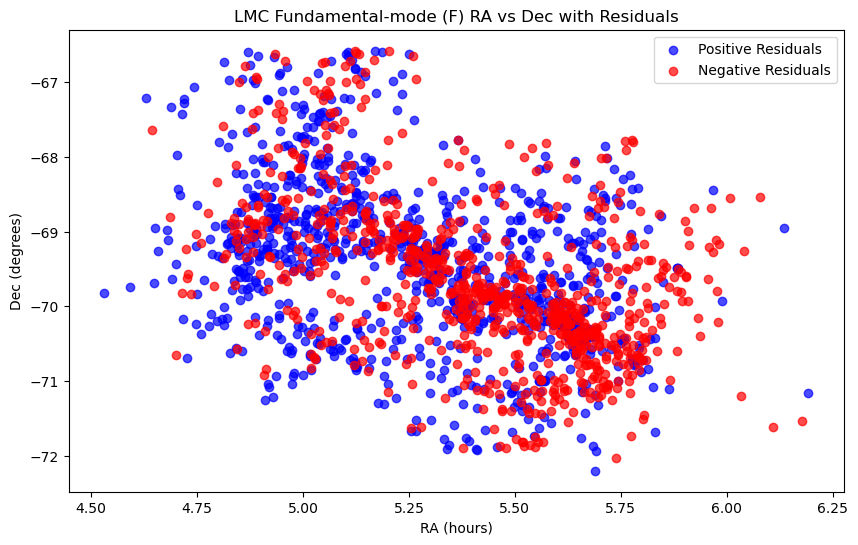

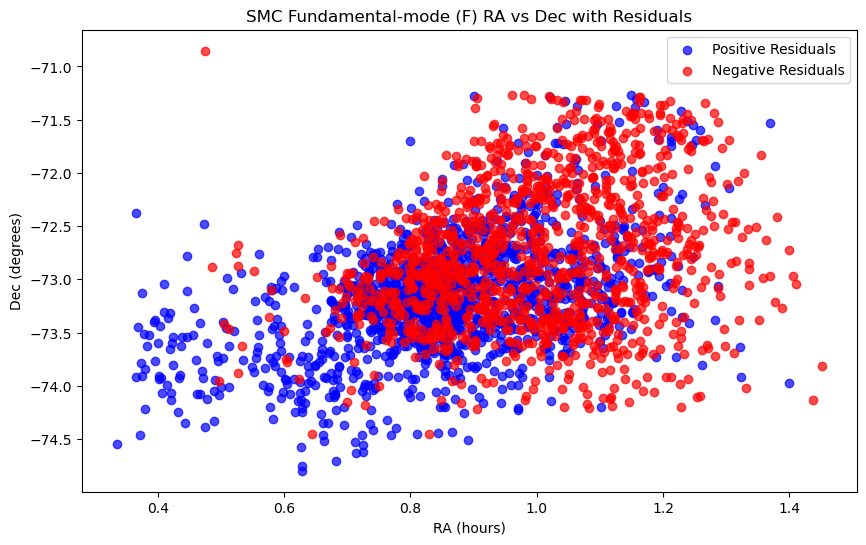

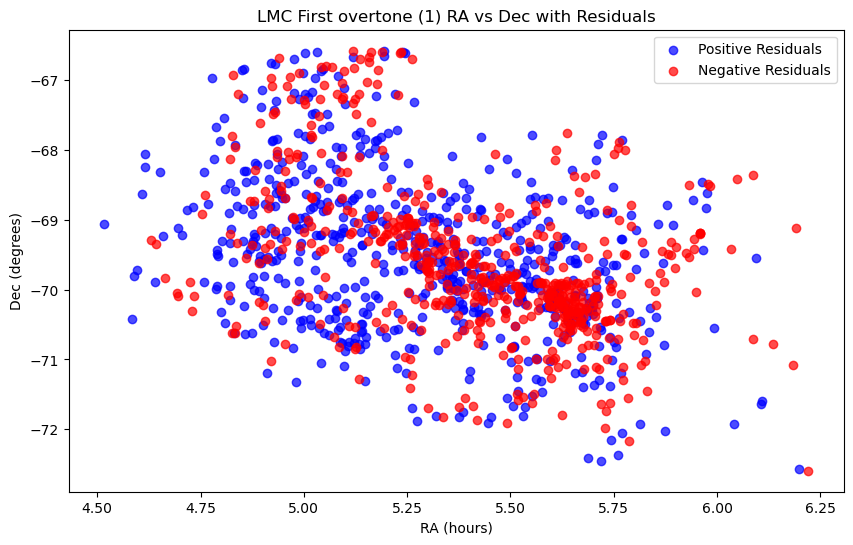

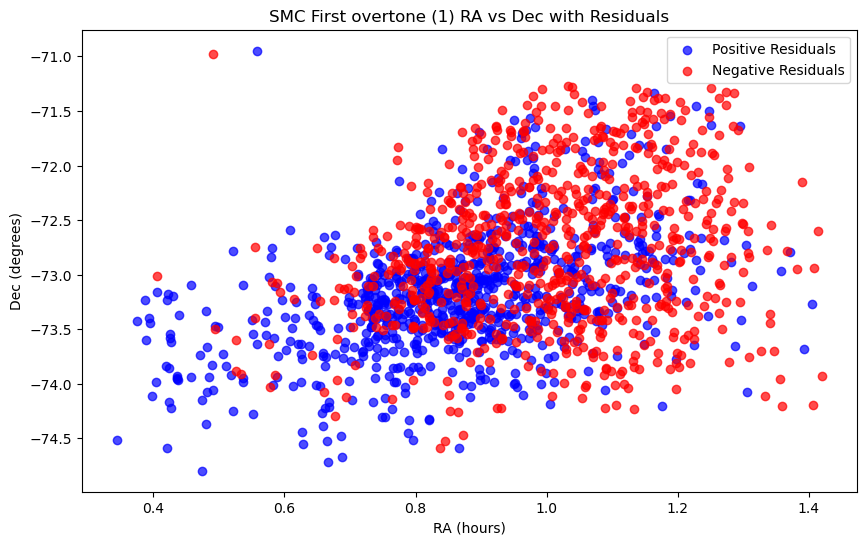

In [11]:
# Function to plot RA vs Dec color-coded by residuals
def plot_residuals_scatter(df, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[df['residuals'] >= 0]['RA0'], df[df['residuals'] >= 0]['Decl0'], color='blue', label='Positive Residuals', alpha=0.7)
    plt.scatter(df[df['residuals'] < 0]['RA0'], df[df['residuals'] < 0]['Decl0'], color='red', label='Negative Residuals', alpha=0.7)
    plt.xlabel('RA (hours)')
    plt.ylabel('Dec (degrees)')
    plt.title(f'{title} RA vs Dec with Residuals')
    plt.legend()
    plt.show()

plot_residuals_scatter(lmcf, 'LMC Fundamental-mode (F)')
plot_residuals_scatter(smcf, 'SMC Fundamental-mode (F)')
plot_residuals_scatter(lmco, 'LMC First overtone (1)')
plot_residuals_scatter(smco, 'SMC First overtone (1)')


## Analysis of the Scatter Plots:
We are looking for any spatial patterns in the distribution of positive and negative residuals. 

In the SMC F plot and SMC 1 plot, there might be local variation in the extinction that are affecting the observed Wesenheit index and log of the periodicity of the cepheid variable stars in that particular region. This could lead to differences in the observed values and the values predicted by the linear regression model, resulting in the positive or negative residuals that are not evenly distributed across the sky. It is also possible that there are some other factors or processes that influence the brightness and variability of the cepheid stars in that region that these factors are not fully accomodated for by the linear regression model.

All other plots LMC F and LMC 1 seems fine that there is no systematic spatial pattern in the residuals. 

This is because, if the residuals show significant clustering, it might suggest that there are spatially varying factors such as interstellar medium variations, calibration issues, or intrinsic property variations affecting the Cepheids.

If the residuals are uniformly scattered, it indicates that the model fits the data well overall, and the residuals are likely due to random errors.